# <center> Final Project - Stage 2 (Data Pre-Processing) </center>

**Kelompok : "ASKLEPIOS"** <br>
**Nama Anggota :** <br>
        - Awalsyah Rinanto Putra <br>
        - Fathah Oscar <br>
        - M Rizky Septiansyah <br>
        - Hermawan Febrianto <br>
        - Devi Puji Ayuningsih <br>
        - Anggita Citanegara Lubis

In [2]:
#import library

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# ubah parameter default matplotlib dengan rcParams
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
# Load data
df = pd.read_csv(r'Ecommerce_finpro.csv')

# Rename kolom 
df = df.rename(columns={'Warehouse_block':'Warehouse',
                        'Mode_of_Shipment':'Shipment',
                        'Customer_care_calls':'Calls',
                        'Customer_rating':'Rating',
                        'Cost_of_the_Product':'Cost',
                        'Prior_purchases':'Purchases',
                        'Product_importance':'Importance',
                        'Discount_offered':'Discount',
                        'Weight_in_gms':'Weight (gram)',
                        'Reached.on.Time_Y.N':'Late'})

# pengelompokkan kolom berdasarkan tipe data dan jenis feature 

str = ['Warehouse', 'Shipment', 'Importance', 'Gender', ] #kolom dengan tipe data string/object
int = ['Calls', 'Rating', 'Cost', 'Purchases', 'Discount', 'Weight (gram)'] #kolom dengan tipe data integer/float

#pengelompokkan jenis feature
cat = ['Warehouse', 'Shipment', 'Importance', 'Gender', 'Rating'] #feature categorical
num = [ 'Cost', 'Discount', 'Weight (gram)', 'Calls', 'Purchases'] #feature numerical 

df.sample(5)

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchases,Importance,Gender,Discount,Weight (gram),Late
2202,2203,D,Flight,5,3,266,3,low,F,19,2508,1
827,828,F,Flight,4,2,209,2,low,F,23,2533,1
229,230,F,Ship,3,3,162,7,medium,F,42,1278,1
10330,10331,C,Ship,5,3,210,6,low,M,6,4203,1
10707,10708,B,Ship,5,2,262,6,low,F,7,1774,0


## 1. Data Cleansing

### A. Handle Missing Values

In [4]:
# cek missing value

df.isna().sum()

ID               0
Warehouse        0
Shipment         0
Calls            0
Rating           0
Cost             0
Purchases        0
Importance       0
Gender           0
Discount         0
Weight (gram)    0
Late             0
dtype: int64

<b> Tidak ada missing values pada dataset </b>

### B. Handle Duplicated Data

In [5]:
# cek baris yang duplikat

df.duplicated().sum()

0

<b> Tidak ada data yang terduplikasi pada dataset </b>

### C. Handle Outliers

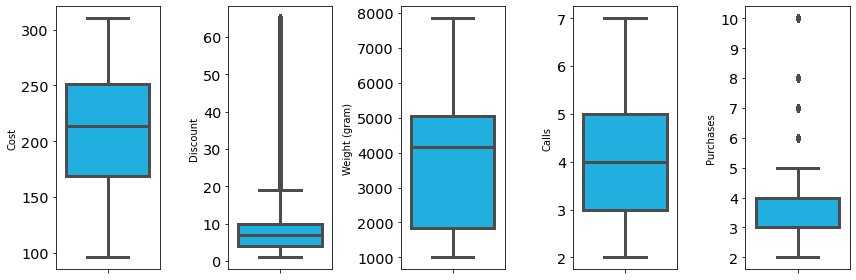

In [6]:
# cek boxplot kolom tipe data int/float uuntuk melihat outlier

for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]], color='deepskyblue', orient='v')
    plt.tight_layout()

Hanya feature discount dan purchase yang merupakan feature numerik dan mempunyai outlier.

#### Remove Outlier Berdasarkan Z-Score

In [7]:
# Remove outlier Z-Score pada feature Discount

print(f'Jumlah baris sebelum outlier dihilangkan: {len(df)}')

zscore = abs(stats.zscore(df['Discount'])) # absolute z-scorenya
filtered_entries = (zscore < 3) # keep kurang dari 3 absolute z-scorenya
df = df[filtered_entries] # filter, ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah outlier dihilangkan: {len(df)}')

Jumlah baris sebelum outlier dihilangkan: 10999
Jumlah baris setelah outlier dihilangkan: 10818


In [8]:
# Remove outlier Z-Score pada feature Purchases

print(f'Jumlah baris sebelum outlier dihilangkan: {len(df)}')

zscore = abs(stats.zscore(df['Purchases'])) # absolute z-scorenya
filtered_entries = (zscore < 3) # keep kurang dari 3 absolute z-scorenya
df = df[filtered_entries] # filter, ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah outlier dihilangkan: {len(df)}')

Jumlah baris sebelum outlier dihilangkan: 10818
Jumlah baris setelah outlier dihilangkan: 10642


#### Berdasarkan IQR

In [9]:
# Remove outliers menggunakan batas atas dan bawah IQR pada feature discount

Q11 = df['Purchases'].quantile(0.25)
Q31 = df['Purchases'].quantile(0.75)
IQR1 = Q31-Q11
low_limit1 = Q11 - (1.5*IQR1)
high_limit1 = Q31 + (1.5*IQR1)
filtered_entries = ((df['Purchases'] >= low_limit1) 
                        & (df['Purchases'] <= high_limit1))
df1 = df[filtered_entries]

print(f'Jumlah baris setelah outlier dihilangkan: {len(df1)}')

Jumlah baris setelah outlier dihilangkan: 9837


In [10]:
# Remove outliers menggunakan batas atas dan bawah IQR pada feature discount

Q11 = df1['Discount'].quantile(0.25)
Q31 = df1['Discount'].quantile(0.75)
IQR1 = Q31-Q11
low_limit1 = Q11 - (1.5*IQR1)
high_limit1 = Q31 + (1.5*IQR1)
filtered_entries = ((df['Discount'] >= low_limit1) 
                        & (df['Discount'] <= high_limit1))
df2 = df[filtered_entries]

print(f'Jumlah baris setelah outlier dihilangkan: {len(df2)}')

Jumlah baris setelah outlier dihilangkan: 8653


Setelah dilakukan penghilangan outlier berdasarkan IQR, terlihar ada banyak sekali baris yang hilang (lebih dari 2000 baris) yang berpotensi menghilangkan informasi penting untuk keperluan supervised learning, oleh karena itu kami memutuskan langkah pre-processing data selanjutnya tidak memakai data yang sudah dilakukan remove outlier dari IQR.

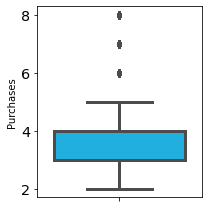

In [11]:
plt.figure(figsize = (3,3))
sns.boxplot(y=df['Purchases'], color='deepskyblue', orient='v')
plt.tight_layout()

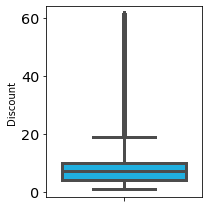

In [12]:
plt.figure(figsize = (3,3))
sns.boxplot(y=df['Discount'], color='deepskyblue', orient='v')
plt.tight_layout()

### D. Feature Transformation

#### Log Transformation

<AxesSubplot:xlabel='Discount', ylabel='Density'>

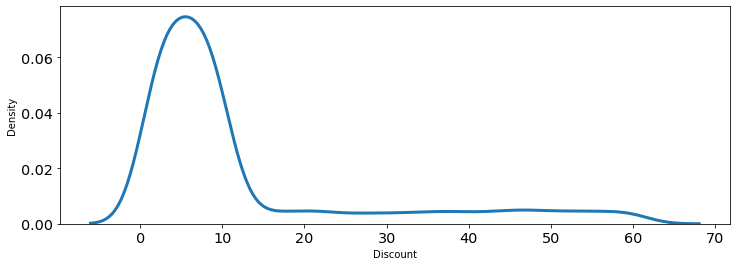

In [13]:
sns.kdeplot(df['Discount']) # hanya discount dan purchases yang merupakan feature numerik distribusinya positively skewed

<AxesSubplot:xlabel='Purchases', ylabel='Density'>

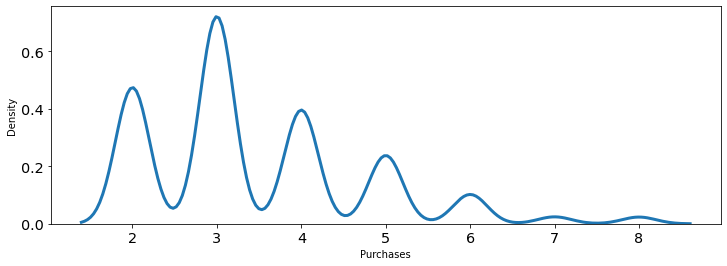

In [16]:
sns.kdeplot(df['Purchases']) # hanya discount dan purchases yang merupakan feature numerik distribusinya positively skewed

In [17]:
# cek nilai skewness feature discount

print('skewness feature diskon: ', df['Discount'].skew(axis=0, skipna=True))

skewness feature diskon:  1.861919412884021


In [18]:
# cek nilai skewness feature purchases

print('skewness feature purchases: ', df['Purchases'].skew(axis=0, skipna=True))

skewness feature purchases:  1.0124137039294367


<AxesSubplot:xlabel='Discount', ylabel='Density'>

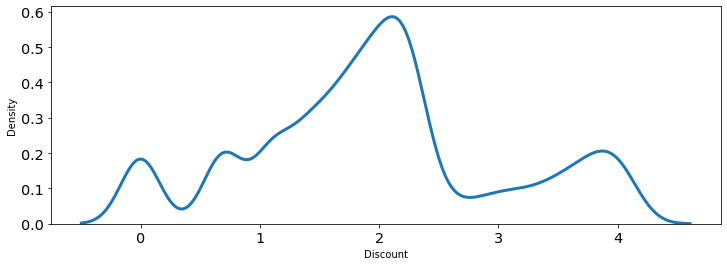

In [19]:
# log transformation feature discount

sns.kdeplot(np.log(df['Discount']))

<AxesSubplot:xlabel='Purchases', ylabel='Density'>

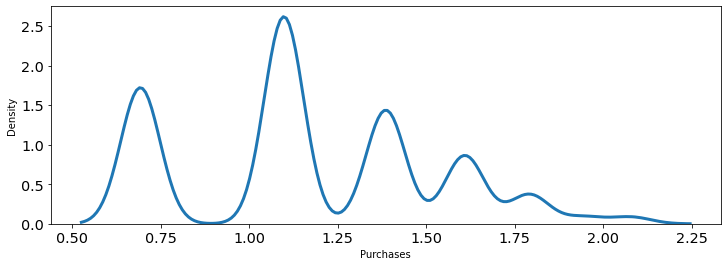

In [20]:
# log transformation feature purchases

sns.kdeplot(np.log(df['Purchases']))

In [21]:
# cek nilai skewness log discount

print('skewness feature diskon:', np.log(df['Discount']).skew(axis=0, skipna=True))

skewness feature diskon: 0.20425712287711678


In [22]:
# cek nilai skewness log purchases

print('skewness feature purchases:', np.log(df['Purchases']).skew(axis=0, skipna=True))

skewness feature purchases: 0.22520898855880445


In [23]:
df['log_purchases'] = np.log(df['Purchases'])
df['log_discount'] = np.log(df['Discount'])

In [26]:
# update dataset dengan tambahan kolom log_purchases dan log_discount

df.sample(5)

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchases,Importance,Gender,Discount,Weight (gram),Late,log_purchases,log_discount
8329,8330,F,Ship,5,1,232,5,low,M,4,1776,0,1.609438,1.386294
3020,3021,A,Flight,3,3,253,4,medium,F,57,2489,1,1.386294,4.043051
8788,8789,C,Ship,4,2,212,3,low,M,5,5413,0,1.098612,1.609438
3241,3242,F,Ship,3,4,170,3,low,M,5,4716,1,1.098612,1.609438
5209,5210,F,Flight,4,5,263,3,medium,F,6,5445,0,1.098612,1.791759


#### Standardization

Dilakukan pada feature Cost, Discount, dan Weight yang merupakan feature numerik dan memiliki nilai variance yang besar.

In [27]:
# Standardization pada kolom numerik
df['Std_Cost'] = StandardScaler().fit_transform(df['Cost'].values.reshape(len(df), 1))
df['Std_Disc'] = StandardScaler().fit_transform(df['log_discount'].values.reshape(len(df), 1))
df['Std_Weight'] = StandardScaler().fit_transform(df['Weight (gram)'].values.reshape(len(df), 1))
df['Std_Purchases'] = StandardScaler().fit_transform(df['log_purchases'].values.reshape(len(df), 1))
df['Std_Calls'] = StandardScaler().fit_transform(df['Calls'].values.reshape(len(df), 1))

In [28]:
# cek nilai variance sebelum distandarisasi

std_feature1 = ['Weight (gram)', 'Cost', 'log_discount', 'log_purchases', 'Calls']

print('variance :') 
round(df[std_feature1].var(), 2)

variance :


Weight (gram)    2689104.90
Cost                2311.48
log_discount           1.12
log_purchases          0.13
Calls                  1.31
dtype: float64

In [29]:
# cek nilai standar deviasi sebelum distandarisasi

print('standard deviation :')
round(df[std_feature1].std(), 2)

standard deviation :


Weight (gram)    1639.85
Cost               48.08
log_discount        1.06
log_purchases       0.35
Calls               1.15
dtype: float64

Terdapat nilai variance dan standar deviasi yang besar pada feature Weight dan Cost.

In [30]:
# cek nilai variance setelah distandarisasi
std_feature2 = ['Std_Cost', 'Std_Disc', 'Std_Weight', 'Std_Purchases', 'Std_Calls']

print('variance :')
round(df[std_feature2].var(), 2)

variance :


Std_Cost         1.0
Std_Disc         1.0
Std_Weight       1.0
Std_Purchases    1.0
Std_Calls        1.0
dtype: float64

In [31]:
# cek nilai standar deviasi setelah distandarisasi

print('standard deviation :')
round(df[std_feature2].std(), 2)

standard deviation :


Std_Cost         1.0
Std_Disc         1.0
Std_Weight       1.0
Std_Purchases    1.0
Std_Calls        1.0
dtype: float64

Nilai variance dan standar deviasi pada 5 feature tersebut semuanya sudah bernilai 1 setelah dilakukan standarisasi.

#### Normalization


Dilakukan pada feature Cost, Discount, Purchases, Calls dan Weight yang merupakan feature numerik dan memiliki nilai variance yang besar.

In [32]:
# Normalization pada feature numerik

df['Norm_Cost'] = MinMaxScaler().fit_transform(df['Cost'].values.reshape(len(df), 1))
df['Norm_Disc'] = MinMaxScaler().fit_transform(df['log_discount'].values.reshape(len(df), 1))
df['Norm_Weight'] = MinMaxScaler().fit_transform(df['Weight (gram)'].values.reshape(len(df), 1))
df['Norm_Purchases'] = MinMaxScaler().fit_transform(df['log_purchases'].values.reshape(len(df), 1))
df['Norm_Calls'] = MinMaxScaler().fit_transform(df['Calls'].values.reshape(len(df), 1))

In [33]:
# cek nilai min dan max setelah dinormalisasi

norm_feature2 = ['Norm_Weight', 'Norm_Cost', 'Norm_Disc', 'Norm_Purchases', 'Norm_Calls']
df[norm_feature2].describe()

,Norm_Weight,Norm_Cost,Norm_Disc,Norm_Purchases,Norm_Calls
count,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000
mean,0.386489,0.535414,0.477102,0.349802,0.413137
std,0.239569,0.224663,0.256873,0.255982,0.229070
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.122133,0.345794,0.337226,0.292481,0.200000
50%,0.463258,0.556075,0.473357,0.292481,0.400000
75%,0.593535,0.724299,0.560121,0.500000,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000


Semua nilai min dan max pada feature yang dinormalisasi sudah bernilai 0 dan 1.

In [36]:
# update dataset setelah dilakukan feature transformasi

df.sample(5)

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchases,Importance,Gender,Discount,...,Std_Cost,Std_Disc,Std_Weight,Std_Purchases,Std_Calls,Norm_Cost,Norm_Disc,Norm_Weight,Norm_Purchases,Norm_Calls
1077,1078,B,Road,4,3,252,2,medium,F,51,...,0.861590,1.866160,-0.602836,-1.366573,-0.057350,0.728972,0.956445,0.242075,0.000000,0.4
10495,10496,F,Ship,4,2,214,6,medium,M,9,...,0.071168,0.223424,0.664413,1.729420,-0.057350,0.551402,0.534491,0.545654,0.792481,0.4
6160,6161,C,Flight,4,5,210,2,medium,M,5,...,-0.012034,-0.333234,1.241932,-1.366573,-0.057350,0.532710,0.391507,0.684003,0.000000,0.4
3564,3565,D,Flight,3,3,263,3,medium,F,9,...,1.090397,0.223424,1.230955,-0.223934,-0.930489,0.780374,0.534491,0.681373,0.292481,0.2
8159,8160,F,Ship,3,1,173,2,medium,F,4,...,-0.781656,-0.544560,1.143138,-1.366573,-0.930489,0.359813,0.337226,0.660336,0.000000,0.2


Tampilan dataset setelah dilakukan normalisasi dan standarisasi.

### E. Feature Encoding

#### Label Encoding

In [37]:
# label encoding pada feature gender (2 unique values) dan Product Importance (feature kategorikal yang ordinal)

# mapping feature gender
mapping_Gender = {
    'F' : 0,
    'M' : 1
}

# mapping feature product importance
mapping_Importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2,
}

# replace kolom gender yang telah dikuantifikasi di dataset
df['Gender'] = df['Gender'].map(mapping_Gender)
df['Importance'] = df['Importance'].map(mapping_Importance)

df

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchases,Importance,Gender,Discount,...,Std_Cost,Std_Disc,Std_Weight,Std_Purchases,Std_Calls,Norm_Cost,Norm_Disc,Norm_Weight,Norm_Purchases,Norm_Calls
0,1,D,Flight,4,2,177,3,0,0,44,...,-0.698454,1.726343,-1.471860,-0.223934,-0.057350,0.378505,0.920532,0.033893,0.292481,0.4
1,2,F,Flight,4,5,216,2,0,1,59,...,0.112769,2.004155,-0.340605,-1.366573,-0.057350,0.560748,0.991891,0.304894,0.000000,0.4
2,3,A,Flight,2,2,183,4,0,1,48,...,-0.573650,1.808746,-0.166190,0.586781,-1.803627,0.406542,0.941698,0.346676,0.500000,0.0
3,4,B,Flight,3,3,176,4,1,1,10,...,-0.719254,0.323204,-1.506011,0.586781,-0.930489,0.373832,0.560121,0.025712,0.500000,0.2
4,5,C,Flight,2,2,184,3,1,0,46,...,-0.552850,1.768441,-0.708949,-0.223934,-1.803627,0.411215,0.931345,0.216654,0.292481,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,1,0,1,...,0.861590,-1.857436,-1.285858,1.215620,-0.057350,0.728972,0.000000,0.078451,0.660964,0.4
10995,10996,B,Ship,4,1,232,5,1,0,6,...,0.445579,-0.160568,-1.463322,1.215620,-0.057350,0.635514,0.435859,0.035939,0.660964,0.4
10996,10997,C,Ship,5,4,242,5,0,0,4,...,0.653585,-0.544560,-1.519427,1.215620,0.815788,0.682243,0.337226,0.022498,0.660964,0.6
10997,10998,F,Ship,5,2,223,6,1,1,2,...,0.258373,-1.200998,-1.485886,1.729420,0.815788,0.593458,0.168613,0.030533,0.792481,0.6


In [38]:
df['Gender'].value_counts()

0    5356
1    5286
Name: Gender, dtype: int64

In [39]:
df['Importance'].value_counts()

0    5173
1    4587
2     882
Name: Importance, dtype: int64

Feature Gender dan Product Importance sudah bertipe numerik.

#### One Hot Encoding

In [40]:
# one hot encoding di feature Warehouse dan Shipment (feature kategorikal yang tidak bersifat ordinal)

for cat in ['Warehouse', 'Shipment']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [41]:
df

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchases,Importance,Gender,Discount,...,Norm_Purchases,Norm_Calls,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship
0,1,D,Flight,4,2,177,3,0,0,44,...,0.292481,0.4,0,0,0,1,0,1,0,0
1,2,F,Flight,4,5,216,2,0,1,59,...,0.000000,0.4,0,0,0,0,1,1,0,0
2,3,A,Flight,2,2,183,4,0,1,48,...,0.500000,0.0,1,0,0,0,0,1,0,0
3,4,B,Flight,3,3,176,4,1,1,10,...,0.500000,0.2,0,1,0,0,0,1,0,0
4,5,C,Flight,2,2,184,3,1,0,46,...,0.292481,0.0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,1,0,1,...,0.660964,0.4,1,0,0,0,0,0,0,1
10995,10996,B,Ship,4,1,232,5,1,0,6,...,0.660964,0.4,0,1,0,0,0,0,0,1
10996,10997,C,Ship,5,4,242,5,0,0,4,...,0.660964,0.6,0,0,1,0,0,0,0,1
10997,10998,F,Ship,5,2,223,6,1,1,2,...,0.792481,0.6,0,0,0,0,1,0,0,1


Feature Warehouse dan Shipment sudah diencoding menjadi kolom-kolom baru yang tipenya numerik.

### F. Handle Class Imbalance

In [42]:
#cek ratio jumlah nilai target

df_late = df.groupby('Late').agg({'ID':'count'}).reset_index().rename(columns={'ID':'Jumlah'})
df_late['Ratio'] = df_late['Jumlah']*100/df_late['Jumlah'].sum()
df_late

,Late,Jumlah,Ratio
0,0,4360,40.969743
1,1,6282,59.030257


Tidak perlu dilakukan karena proportion of minority class > 40%

## 2. Feature Engineering

### A. Feature Selection

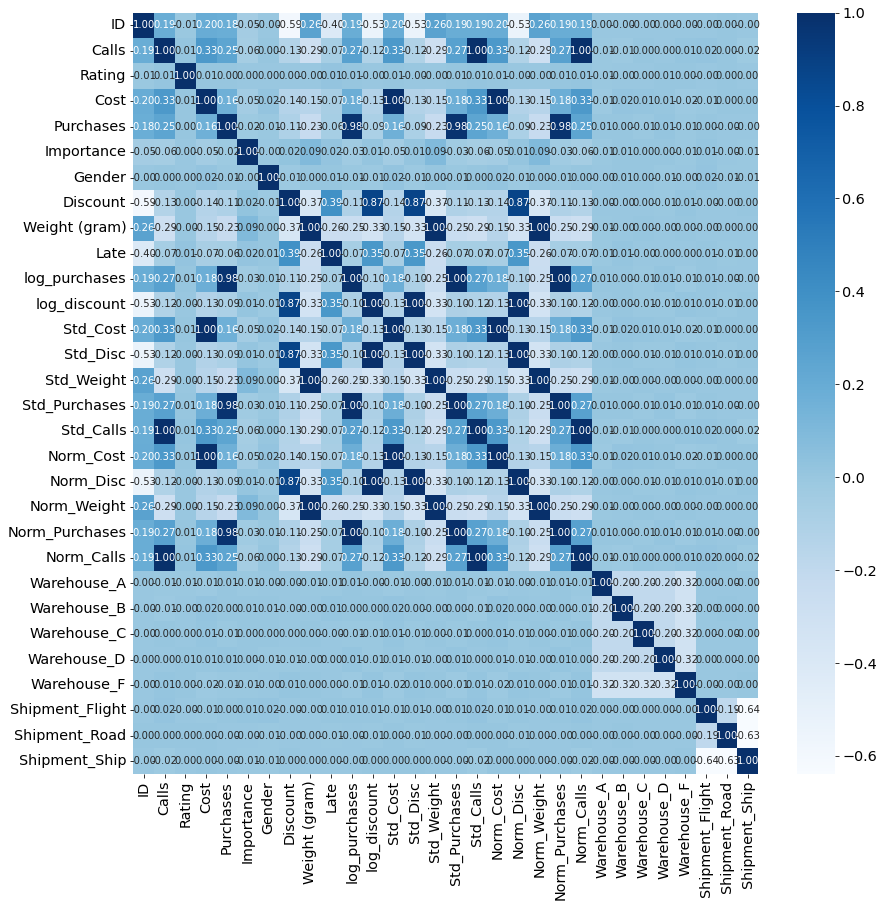

In [43]:
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

<b> Analisis Heatmap plot: </b>

- Menghapus feature  <b>ID </b> dikarenakan feature tersebut tidak memiliki arti penting untuk kegunaan proses modelling. <br>
- Menghapus feature <b> Warehouse </b> dan <b> Shipment </b> karena sudah dilakukan feature encoding. <br>
- Dari heatmap plot, tidak ada feature yang perlu dihapus karena tidak ada feature yang redundant dengan nilai korelasi antar feature > 0.7.

In [44]:
df.drop(columns=['ID', 'Warehouse', 'Shipment' ], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10642 entries, 0 to 10998
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Calls            10642 non-null  int64  
 1   Rating           10642 non-null  int64  
 2   Cost             10642 non-null  int64  
 3   Purchases        10642 non-null  int64  
 4   Importance       10642 non-null  int64  
 5   Gender           10642 non-null  int64  
 6   Discount         10642 non-null  int64  
 7   Weight (gram)    10642 non-null  int64  
 8   Late             10642 non-null  int64  
 9   log_purchases    10642 non-null  float64
 10  log_discount     10642 non-null  float64
 11  Std_Cost         10642 non-null  float64
 12  Std_Disc         10642 non-null  float64
 13  Std_Weight       10642 non-null  float64
 14  Std_Purchases    10642 non-null  float64
 15  Std_Calls        10642 non-null  float64
 16  Norm_Cost        10642 non-null  float64
 17  Norm_Disc   

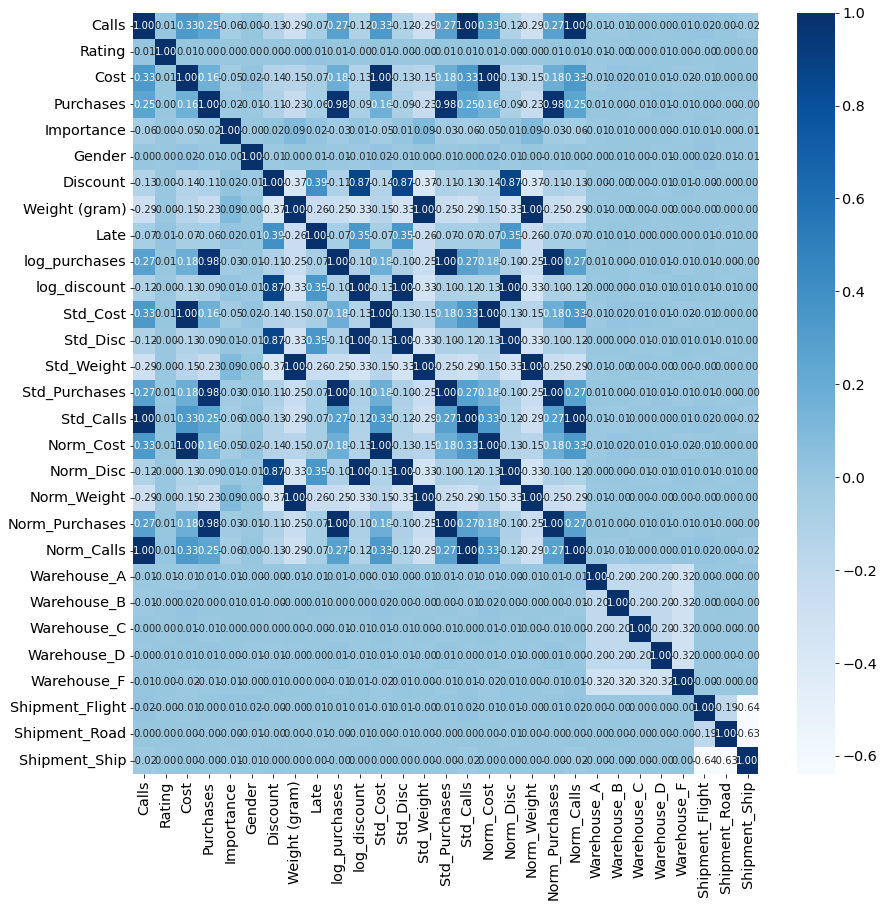

In [45]:
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

### B. Feature Extraction

In [46]:
df

,Calls,Rating,Cost,Purchases,Importance,Gender,Discount,Weight (gram),Late,log_purchases,...,Norm_Purchases,Norm_Calls,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship
0,4,2,177,3,0,0,44,1233,1,1.098612,...,0.292481,0.4,0,0,0,1,0,1,0,0
1,4,5,216,2,0,1,59,3088,1,0.693147,...,0.000000,0.4,0,0,0,0,1,1,0,0
2,2,2,183,4,0,1,48,3374,1,1.386294,...,0.500000,0.0,1,0,0,0,0,1,0,0
3,3,3,176,4,1,1,10,1177,1,1.386294,...,0.500000,0.2,0,1,0,0,0,1,0,0
4,2,2,184,3,1,0,46,2484,1,1.098612,...,0.292481,0.0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,1,0,1,1538,1,1.609438,...,0.660964,0.4,1,0,0,0,0,0,0,1
10995,4,1,232,5,1,0,6,1247,0,1.609438,...,0.660964,0.4,0,1,0,0,0,0,0,1
10996,5,4,242,5,0,0,4,1155,0,1.609438,...,0.660964,0.6,0,0,1,0,0,0,0,1
10997,5,2,223,6,1,1,2,1210,0,1.791759,...,0.792481,0.6,0,0,0,0,1,0,0,1


Tidak ada fitur yang bisa diekstraksi dari dataset.

### C. Feature Tambahan

<b> 1. Waktu pengiriman <br> </b>
Bisa dilakukan analisis regresi untuk memprediksi waktu pengiriman customer di waktu yang akan datang.

<b> 2. Alamat customer (Kota-Provinsi/Luar negeri) <br> </b>
Jika jauh, potensi terlambat makin besar karena makin banyak peluang mengalami kendala pengiriman. <br>
Jika di luar negeri, potensi terlambat makin besar karena penyesuaian regulasi import dan eskport pengiriman barang. <br>

<b> 3. Alamat warehouse <br> </b>
Bisa digunakan untuk merekomendasikan warehouse mana yang paling dekat dengan alamat customer agar potensi keterlambatan dapat direduksi. <br>

<b> 4. Musim <br> </b>
Pada musim hujan atau musim dingin, moda pengiriman kapal bisa terkendala karena cuaca buruk bisa mengakibatkan dilarangnya kapal berlayar.

<b> 5. Kapasitas Pengiriman Per Hari <br> </b>
Makin sedikit kapasitas, potensi terlambat makin besar karena makin sedikit pengiriman dilakukan.

<b> 6. Traffic Route <br> </b>
Makin padat rute yang dipilih, potensi terlambat makin besar karena durasi pengiriman makin lama.

In [47]:
df.to_csv('Ecommerce_finpro4.csv', index = False)